<font size = 6> <center> <b> TP-03: Information Retrieval Models

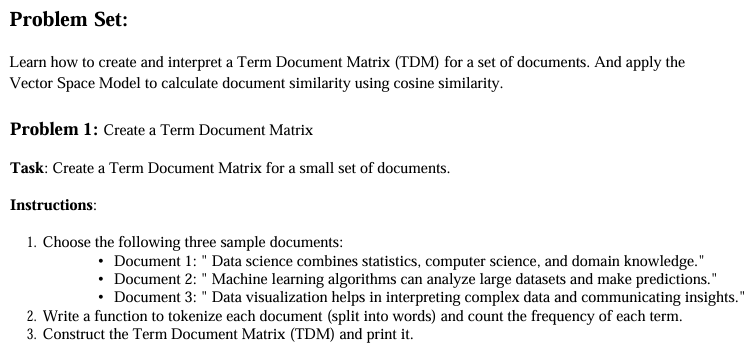

In [24]:
import pandas as pd
from collections import Counter

def tokenize_and_count(document):
    """Tokenize a document into words and count term frequencies."""
    words = document.lower().split()  # Convert to lowercase and split into words
    return Counter(words)  # Count the frequency of each term

def create_term_document_matrix(documents):
    """Create a Term Document Matrix (TDM) for a list of documents."""
    # Tokenize and count terms for each document
    term_counts = [tokenize_and_count(doc) for doc in documents]
    
    # Get a unique set of all terms across all documents
    all_terms = sorted(set(term for term_count in term_counts for term in term_count))
    
    # Construct the TDM
    tdm_data = {f"Document {i+1}": [term_counts[i].get(term, 0) for term in all_terms]
                for i in range(len(documents))}
    
    # Create a DataFrame for better visualization
    tdm = pd.DataFrame(tdm_data, index=all_terms)
    tdm.index.name = "Term"
    return tdm

# =================================================================================================

documents = ["Data science combines statistics, computer science, and domain knowledge.",
             "Machine learning algorithms can analyze large datasets and make predictions.",
             "Data visualization helps in interpreting complex data and communicating insights."]
    
# Create the Term Document Matrix
tdm = create_term_document_matrix(documents)
    
# Print the TDM
print("Term Document Matrix (TDM):")
tdm.transpose()

Term Document Matrix (TDM):


Term,algorithms,analyze,and,can,combines,communicating,complex,computer,data,datasets,...,knowledge.,large,learning,machine,make,predictions.,science,"science,","statistics,",visualization
Document 1,0,0,1,0,1,0,0,1,1,0,...,1,0,0,0,0,0,1,1,1,0
Document 2,1,1,1,1,0,0,0,0,0,1,...,0,1,1,1,1,1,0,0,0,0
Document 3,0,0,1,0,0,1,1,0,2,0,...,0,0,0,0,0,0,0,0,0,1


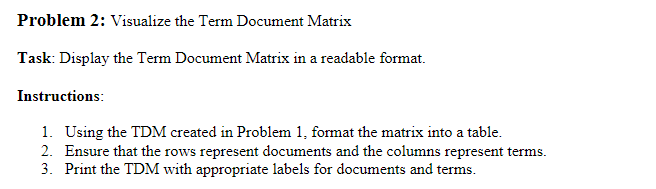

In [25]:
import pandas as pd
from collections import Counter

def tokenize_and_count(document):
    """Tokenize a document into words and count term frequencies."""
    words = document.lower().split()  # Convert to lowercase and split into words
    return Counter(words)  # Count the frequency of each term

def create_term_document_matrix(documents):
    """Create a Term Document Matrix (TDM) for a list of documents."""
    # Tokenize and count terms for each document
    term_counts = [tokenize_and_count(doc) for doc in documents]
    
    # Get a unique set of all terms across all documents
    all_terms = sorted(set(term for term_count in term_counts for term in term_count))
    
    # Construct the TDM
    tdm_data = {f"Document {i+1}": [term_counts[i].get(term, 0) for term in all_terms]
                for i in range(len(documents))}
    
    # Create a DataFrame for better visualization
    tdm = pd.DataFrame(tdm_data, index=all_terms)
    tdm.index.name = "Term"
    return tdm

def visualize_tdm(tdm):
    """Format and display the TDM with rows as documents and columns as terms."""
    # Transpose the TDM for better readability
    readable_tdm = tdm.T  # Transpose: Documents as rows, Terms as columns
    readable_tdm.index.name = "Document"
    
    print("\nFormatted Term Document Matrix (TDM):")
    return readable_tdm

# Sample documents
documents = ["Data science combines statistics, computer science, and domain knowledge.",
             "Machine learning algorithms can analyze large datasets and make predictions.",
             "Data visualization helps in interpreting complex data and communicating insights."
            ]
    
# Create the Term Document Matrix
tdm = create_term_document_matrix(documents)
    
# Visualize the TDM
visualize_tdm(tdm)


Formatted Term Document Matrix (TDM):


Term,algorithms,analyze,and,can,combines,communicating,complex,computer,data,datasets,...,knowledge.,large,learning,machine,make,predictions.,science,"science,","statistics,",visualization
Document,,,,,,,,,,,,,,,,,,,,,
Document 1,0,0,1,0,1,0,0,1,1,0,...,1,0,0,0,0,0,1,1,1,0
Document 2,1,1,1,1,0,0,0,0,0,1,...,0,1,1,1,1,1,0,0,0,0
Document 3,0,0,1,0,0,1,1,0,2,0,...,0,0,0,0,0,0,0,0,0,1


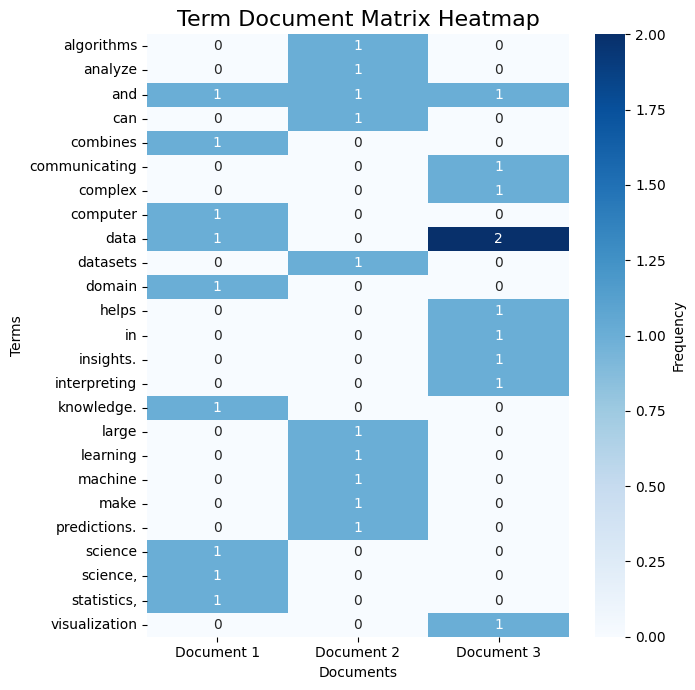

In [26]:
import seaborn as sns
import matplotlib.pyplot as plt

def plot_tdm_heatmap(tdm):
    """Plot a heatmap for the Term Document Matrix."""
    plt.figure(figsize=(7, 7))
    sns.heatmap(tdm, annot=True, fmt="d", cmap="Blues", cbar_kws={'label': 'Frequency'})
    plt.title("Term Document Matrix Heatmap", fontsize=16)
    plt.xlabel("Documents")
    plt.ylabel("Terms")
    plt.tight_layout()
    plt.show()

if __name__ == "__main__":
    # Sample documents
    documents = [
        "Data science combines statistics, computer science, and domain knowledge.",
        "Machine learning algorithms can analyze large datasets and make predictions.",
        "Data visualization helps in interpreting complex data and communicating insights."
    ]
    
    # Create the Term Document Matrix
    tdm = create_term_document_matrix(documents)
    
    # Plot the heatmap
    plot_tdm_heatmap(tdm)


The term-document matrix heatmap provides a visual representation of the word frequencies in three different documents. Based on the visualization, we can infer that:

 - Document 2 is the most comprehensive document, covering a wider range of topics.

 - Document 1 is more focused on specific topics or has a narrower scope.

 - Document 3 might be a summary or overview, highlighting specific keywords.

While this heatmap offers valuable insights, it's important to consider the limitations of word frequency analysis. A more nuanced understanding would require incorporating semantic analysis, contextual information, and other text mining techniques.

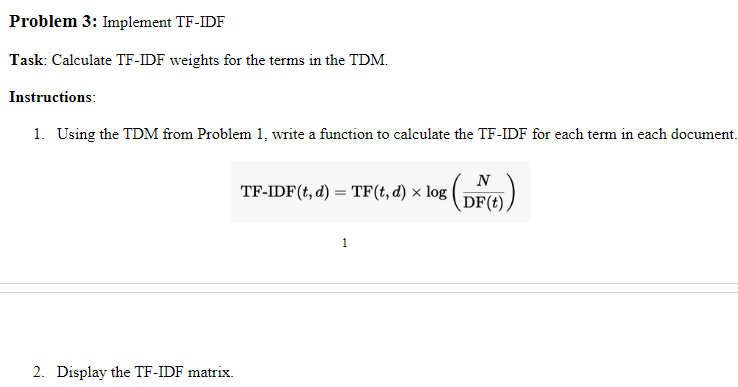

In [27]:
import numpy as np

def calculate_tfidf(tdm_df):
    N = len(tdm_df)  
    tf = tdm_df  
    df = np.where(tdm_df > 0, 1, 0).sum(axis=0)
    
    idf = np.log(N / df)
    tfidf = tf * idf
    
    return pd.DataFrame(tfidf, columns=tdm_df.columns, index=tdm_df.index)

tdm_df = create_term_document_matrix(documents=documents)
tfidf_df = calculate_tfidf(tdm_df)
tfidf_df.transpose()

Term,algorithms,analyze,and,can,combines,communicating,complex,computer,data,datasets,...,knowledge.,large,learning,machine,make,predictions.,science,"science,","statistics,",visualization
Document 1,0.000000,0.000000,1.021651,0.000000,1.021651,0.000000,0.000000,1.021651,1.021651,0.000000,...,1.021651,0.000000,0.000000,0.000000,0.000000,0.000000,1.021651,1.021651,1.021651,0.000000
Document 2,0.916291,0.916291,0.916291,0.916291,0.000000,0.000000,0.000000,0.000000,0.000000,0.916291,...,0.000000,0.916291,0.916291,0.916291,0.916291,0.916291,0.000000,0.000000,0.000000,0.000000
Document 3,0.000000,0.000000,1.021651,0.000000,0.000000,1.021651,1.021651,0.000000,2.043302,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.021651


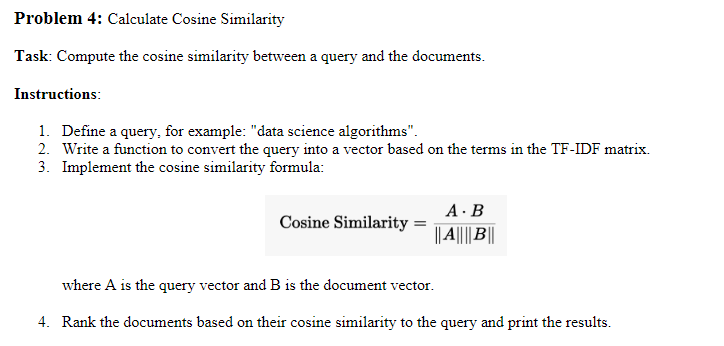

In [28]:
import pandas as pd
from sklearn.feature_extraction.text import TfidfVectorizer

# Define the documents
Document = [
    "Data science combines statistics, computer science, and domain knowledge.",
    "Machine learning algorithms can analyze large datasets and make predictions.",
    "Data visualization helps in interpreting complex data and communicating insights."
]

# Initialize TfidfVectorizer and transform the documents
vectorizer = TfidfVectorizer()
tf_idf_df = pd.DataFrame(vectorizer.fit_transform(Document).toarray(), columns=vectorizer.get_feature_names_out())

# Function to vectorize a query
def vectorize_query(query):
    return pd.Series(vectorizer.transform([query]).toarray().flatten(), index=tf_idf_df.columns).reindex(tf_idf_df.columns, fill_value=0)

# Use the function to vectorize your query
query_vector = vectorize_query("data science algorithms")
query_vector

algorithms       0.622766
analyze          0.000000
and              0.000000
can              0.000000
combines         0.000000
communicating    0.000000
complex          0.000000
computer         0.000000
data             0.473630
datasets         0.000000
domain           0.000000
helps            0.000000
in               0.000000
insights         0.000000
interpreting     0.000000
knowledge        0.000000
large            0.000000
learning         0.000000
machine          0.000000
make             0.000000
predictions      0.000000
science          0.622766
statistics       0.000000
visualization    0.000000
dtype: float64

             Cosine_Similarity
Document_ID                   
Document_1            0.509637
Document_2            0.203679
Document_3            0.231761


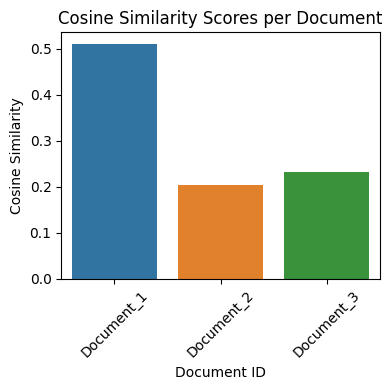

In [29]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Function to compute cosine similarity
def cosine_similarity(query_vector, tf_idf_df):
    query_norm = np.linalg.norm(query_vector)
    doc_norm = np.linalg.norm(tf_idf_df, axis=1)
    dot_product = np.dot(tf_idf_df, query_vector)
    cosine_similarities = dot_product / (query_norm * doc_norm)
    return cosine_similarities

# Compute cosine similarities
cosine_similarities = cosine_similarity(query_vector, tf_idf_df)

# Create a DataFrame to display document IDs and their cosine similarity scores
cosine_similarities_df = pd.DataFrame({
    "Document_ID": [f"Document_{i+1}" for i in range(len(cosine_similarities))],
    "Cosine_Similarity": cosine_similarities
})

# Set the Document_ID as the index for better readability
cosine_similarities_df.set_index("Document_ID", inplace=True)

# Display the cosine similarity scores
print(cosine_similarities_df)

# Plot the cosine similarity scores as a bar graph
def plot_cosine_similarities(cosine_similarities_df):
    plt.figure(figsize=(4, 4))
    sns.barplot(
        x=cosine_similarities_df.index,
        y=cosine_similarities_df['Cosine_Similarity'],
        hue=cosine_similarities_df.index,  # Explicitly set hue
        dodge=False,
        legend=False
    )
    plt.title("Cosine Similarity Scores per Document")
    plt.xlabel("Document ID")
    plt.ylabel("Cosine Similarity")
    plt.xticks(rotation=45)
    plt.tight_layout()
    plt.show()

# Call the plotting function
plot_cosine_similarities(cosine_similarities_df)


Based on the cosine similarity scores, Document 1 is the most relevant document to the query, followed by Document 2. Document 3 appears to be the least relevant.

This analysis provides a quantitative measure of the similarity between the query and the documents, which can be useful in various applications such as information retrieval, recommendation systems, and natural language processing.

However, it's important to note that cosine similarity is just one metric and should be used in conjunction with other factors, such as the actual content of the documents and the specific context of the query, for a more comprehensive understanding of relevance.

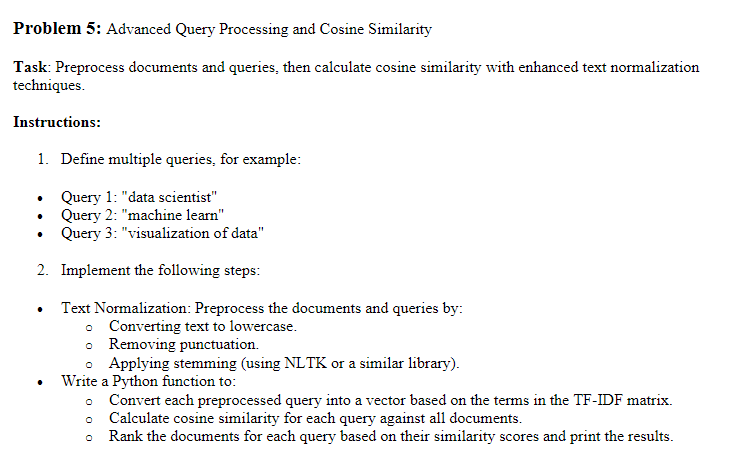

In [45]:
import pandas as pd
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics.pairwise import cosine_similarity
from nltk.stem.porter import PorterStemmer
import string
import re
import nltk
# nltk.download('stopwords')
from nltk.corpus import stopwords

queries = [
    "data scientist",
    "machine learn",
    "visualization of data"]

# Initialize the Porter Stemmer
stemmer = PorterStemmer()
stop_words = set(stopwords.words('english'))

# Text normalization function
def preprocess_text(text):
    # Convert to lowercase
    text = text.lower()

    # Remove punctuation
    text = text.translate(str.maketrans('', '', string.punctuation))

    # Remove stopwords and apply stemming
    words = [stemmer.stem(word) for word in text.split() if word not in stop_words]

    # Join words back into a single string
    return ' '.join(words)

if __name__ == "__main__":

    # Preprocess documents
    processed_documents = [preprocess_text(doc) for doc in Document]

    # Preprocess queries
    processed_queries = [preprocess_text(query) for query in queries]

    # Display the processed documents and queries
    print("Processed Documents:", processed_documents)
    print("Processed Queries:", processed_queries)

Processed Documents: ['data scienc combin statist comput scienc domain knowledg', 'machin learn algorithm analyz larg dataset make predict', 'data visual help interpret complex data commun insight']
Processed Queries: ['data scientist', 'machin learn', 'visual data']


In [46]:
# Initialize the Porter Stemmer
stemmer = PorterStemmer()
stop_words = set(stopwords.words('english'))

# Text normalization function
def preprocess_text(text):
    # Convert to lowercase
    text = text.lower()

    # Remove punctuation
    text = text.translate(str.maketrans('', '', string.punctuation))
    
    # Remove stopwords and apply stemming
    words = [stemmer.stem(word) for word in text.split() if word not in stop_words]
    
    # Join words back into a single string
    return ' '.join(words)

# Initialize TfidfVectorizer with preprocessed text
vectorizer = TfidfVectorizer()

# Fit and transform the processed documents
tfidf_matrix = vectorizer.fit_transform(processed_documents)

# Convert to a DataFrame for easier viewing
terms = vectorizer.get_feature_names_out()
tfidf_df = pd.DataFrame(tfidf_matrix.toarray(), index=[f"Document {i+1}" for i in range(len(processed_documents))], columns=terms)

# Display the TF-IDF matrix
print("TF-IDF Matrix:")
tfidf_df

TF-IDF Matrix:


,algorithm,analyz,combin,commun,complex,comput,data,dataset,domain,help,...,interpret,knowledg,larg,learn,machin,make,predict,scienc,statist,visual
Document 1,0.000000,0.000000,0.323112,0.000000,0.000000,0.323112,0.245735,0.000000,0.323112,0.000000,...,0.000000,0.323112,0.000000,0.000000,0.000000,0.000000,0.000000,0.646225,0.323112,0.000000
Document 2,0.353553,0.353553,0.000000,0.000000,0.000000,0.000000,0.000000,0.353553,0.000000,0.000000,...,0.000000,0.000000,0.353553,0.353553,0.353553,0.353553,0.353553,0.000000,0.000000,0.000000
Document 3,0.000000,0.000000,0.000000,0.346821,0.346821,0.000000,0.527533,0.000000,0.000000,0.346821,...,0.346821,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.346821


In [49]:
# Transform queries into the TF-IDF space of the document terms
query_vectors = vectorizer.transform(processed_queries)

# Display query vectors in DataFrame format
query_tfidf_df = pd.DataFrame(query_vectors.toarray(), index=[f"Query {i+1}" for i in range(len(queries))], columns=terms)
print("Query TF-IDF Matrix:")
query_tfidf_df

Query TF-IDF Matrix:


,algorithm,analyz,combin,commun,complex,comput,data,dataset,domain,help,...,interpret,knowledg,larg,learn,machin,make,predict,scienc,statist,visual
Query 1,0.0,0.0,0.0,0.0,0.0,0.0,1.000000,0.0,0.0,0.0,...,0.0,0.0,0.0,0.000000,0.000000,0.0,0.0,0.0,0.0,0.000000
Query 2,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,...,0.0,0.0,0.0,0.707107,0.707107,0.0,0.0,0.0,0.0,0.000000
Query 3,0.0,0.0,0.0,0.0,0.0,0.0,0.605349,0.0,0.0,0.0,...,0.0,0.0,0.0,0.000000,0.000000,0.0,0.0,0.0,0.0,0.795961


Query 1 Ranking:
Document 3 - Similarity Score: 0.5275
Document 1 - Similarity Score: 0.2457
Document 2 - Similarity Score: 0.0000


Query 2 Ranking:
Document 2 - Similarity Score: 0.5000
Document 1 - Similarity Score: 0.0000
Document 3 - Similarity Score: 0.0000


Query 3 Ranking:
Document 3 - Similarity Score: 0.5954
Document 1 - Similarity Score: 0.1488
Document 2 - Similarity Score: 0.0000




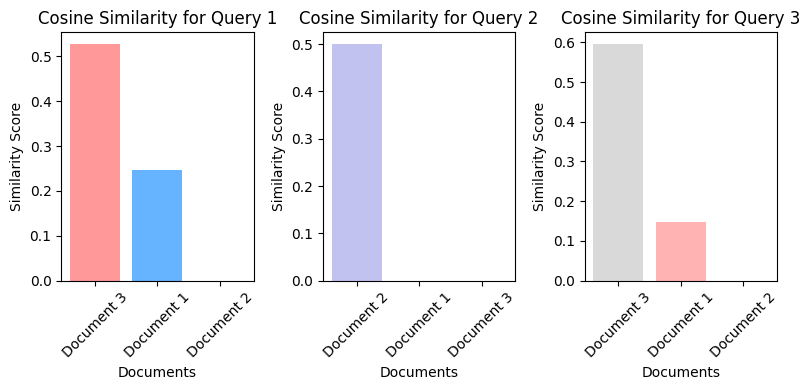

In [81]:
# Cosine Similarity Function
def rank_documents_by_similarity(query_vectors, document_vectors):
    """
    Compute cosine similarity between the query vectors and document vectors,
    and return the documents ranked by similarity for each query.
    """
    similarity_scores = cosine_similarity(query_vectors, document_vectors)

    ranked_results = {}
    for i, query_similarity in enumerate(similarity_scores):
        # Sort the documents by similarity score (highest to lowest)
        ranked_documents = sorted(enumerate(query_similarity), key=lambda x: x[1], reverse=True)
        ranked_results[f"Query {i+1}"] = [(f"Document {doc_id+1}", score) for doc_id, score in ranked_documents]

    return ranked_results

# Compute similarity and rank documents for each query
ranked_documents = rank_documents_by_similarity(query_vectors, tfidf_matrix)

# Display the ranked documents for each query
for query_id, results in ranked_documents.items():
    print(f"{query_id} Ranking:")
    for doc, score in results:
        print(f"{doc} - Similarity Score: {score:.4f}")
    print("\n")


# Plotting the results on the same line
fig, axes = plt.subplots(1, len(queries), figsize=(8, 4))  # 1 row, multiple columns

# Define distinct color palettes for each query
color_palettes = [
    ['#ff9999', '#66b3ff', '#99ff99', '#ffcc99'],  # Color palette for Query 1
    ['#c2c2f0', '#ffb3e6', '#c2f0c2', '#ff6666'],  # Color palette for Query 2
    ['#d9d9d9', '#ffb3b3', '#c2c2c2', '#ffccff']   # Color palette for Query 3
]

# Loop through each query and plot
for i, (query_id, results) in enumerate(ranked_documents.items()):
    documents = [doc for doc, score in results]
    scores = [score for doc, score in results]
    
    # Use the color palette for the current query
    colors = color_palettes[i]
    
    # Plot bars with different colors
    axes[i].bar(documents, scores, color=colors[:len(documents)])  # Limit to the number of documents
    
    axes[i].set_title(f"Cosine Similarity for {query_id}")
    axes[i].set_xlabel("Documents")
    axes[i].set_ylabel("Similarity Score")
    axes[i].tick_params(axis='x', rotation=45)  # Rotate x-axis labels for better readability

# Display the plot
plt.tight_layout()
plt.show()

Based on the cosine similarity scores, we can conclude that:

 - Document 3 is the most relevant document overall, showing high similarity to two out of the three queries.

 - Document 1 exhibits moderate relevance to all three queries.

 - Document 2 appears to be the least relevant, with low similarity scores across all queries.

This analysis provides valuable insights into the relationship between the documents and the queries. It can be utilized in various applications, such as information retrieval, recommendation systems, and natural language processing.

However, it's important to remember that cosine similarity is just one metric. Other factors like document length, topic coverage, and user context should also be considered for a comprehensive understanding of relevance.

### References

 - NLPstandford book

 - L. PageandS. BrinandR.MotwaniandT. Winograd, ThePageRank CitationRanking: Bringing Order tothe Web, Technical Report. Stanford InfoLab, 1999, http://infolab.stanford.edu/~backrub/google.html
 
 - T.-Y. Liu, Learning toRank forInformation Retrieval, Foundations and Trends in Information Retrieval Vol. 3, No. 3(2009): http://didawiki.di.unipi.it/lib/exe/fetch.php/magistraleinformatica/_learning_to_rank.pdf
 
 - https://medium.com/@deepanshi.pal/a-closer-look-information-retrieval-models-in-nlpexplored-6545a4d6bc46
 
 - https://spotintelligence.com/2023/09/07/vector-space-model/


### <center><b> The End !!! 